PCA
---
### based off code from https://datascienceplus.com/principal-component-analysis-pca-with-python/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter

In [2]:
# Loading data
file_path = Path("encoded_pitcher_stat_sal_dem.csv")
df = pd.read_csv(file_path)
df

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,R,SH,SF,GIDP,salary,birthYear,birthMonth,weight,height,throws
0,abadfe01,2016,1,16,0,1,4,39,0,0,...,11,0.0,1.0,6.0,1250000.0,1985.0,12.0,235.0,74.0,0
1,alberma01,2016,1,4,0,2,6,58,1,0,...,44,3.0,2.0,4.0,2000000.0,1983.0,1.0,225.0,73.0,1
2,allenco01,2016,1,7,0,3,5,67,0,0,...,23,3.0,2.0,7.0,4150000.0,1988.0,11.0,210.0,73.0,1
3,alvarjo02,2016,1,12,0,1,3,64,0,0,...,29,1.0,1.0,5.0,507500.0,1989.0,5.0,195.0,71.0,0
4,anderbr04,2016,1,13,1,1,2,4,3,0,...,15,1.0,1.0,0.0,15800000.0,1988.0,2.0,230.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,yateski01,2016,1,17,0,2,1,41,0,0,...,24,1.0,1.0,1.0,511900.0,1987.0,3.0,205.0,70.0,1
412,youngch03,2016,1,11,0,3,9,34,13,0,...,63,0.0,4.0,3.0,4250000.0,1979.0,5.0,255.0,82.0,1
413,zieglbr01,2016,1,0,1,2,3,36,0,0,...,13,1.0,1.0,10.0,5500000.0,1979.0,10.0,220.0,76.0,1
414,zimmejo02,2016,1,9,0,9,7,19,18,0,...,63,1.0,5.0,8.0,18000000.0,1986.0,5.0,225.0,74.0,1


In [3]:
df=df.drop(['playerID'], axis=1)
df.head()

,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,...,R,SH,SF,GIDP,salary,birthYear,birthMonth,weight,height,throws
0,2016,1,16,0,1,4,39,0,0,0,...,11,0.0,1.0,6.0,1250000.0,1985.0,12.0,235.0,74.0,0
1,2016,1,4,0,2,6,58,1,0,0,...,44,3.0,2.0,4.0,2000000.0,1983.0,1.0,225.0,73.0,1
2,2016,1,7,0,3,5,67,0,0,0,...,23,3.0,2.0,7.0,4150000.0,1988.0,11.0,210.0,73.0,1
3,2016,1,12,0,1,3,64,0,0,0,...,29,1.0,1.0,5.0,507500.0,1989.0,5.0,195.0,71.0,0
4,2016,1,13,1,1,2,4,3,0,0,...,15,1.0,1.0,0.0,15800000.0,1988.0,2.0,230.0,76.0,0


In [14]:
# define features columns for later
x_cols=[i for i in df.columns if i not in ('salary')]

In [4]:
# create scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [5]:
# scale data
scaled_data = scaler.transform(df)

In [6]:
# import PCA and fit to scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [7]:
# see shape of scaled data
scaled_data.shape

(416, 35)

In [9]:
# create variable for pca-transformed features
x_pca = pca.transform(scaled_data)

In [10]:
# see shape of features after PCA transformation
x_pca.shape

(416, 2)

Text(0, 0.5, 'Second Principal Component')

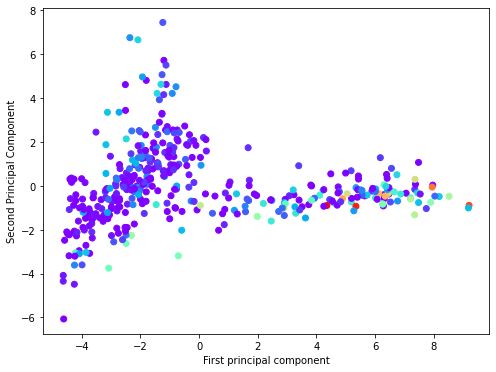

In [12]:
# plot 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['salary'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

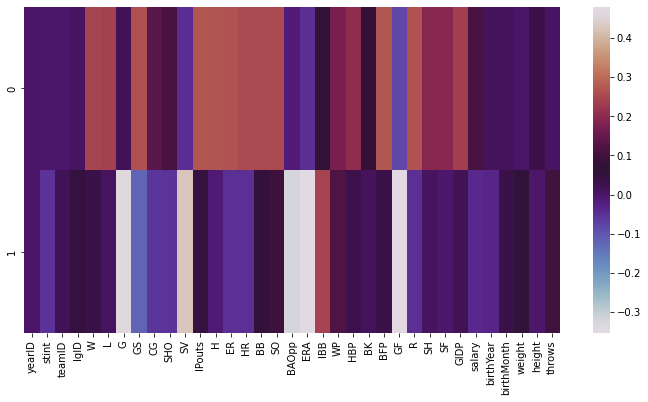

In [16]:
# view heatmap of features
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')